<center><h3>Practice Ex-2: Confusion Matrix</h3></center>
<p style='text-align:center'>R Abhijit Srivathsan<br>
2448044</p>

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


### Loading the dataset and performing data Pre-processing

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [3]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Random forest Classification

In [4]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

### Prediction and Evaluation


In [5]:
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [7]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.79
Precision: 0.76
Recall: 0.73
F1-score: 0.74


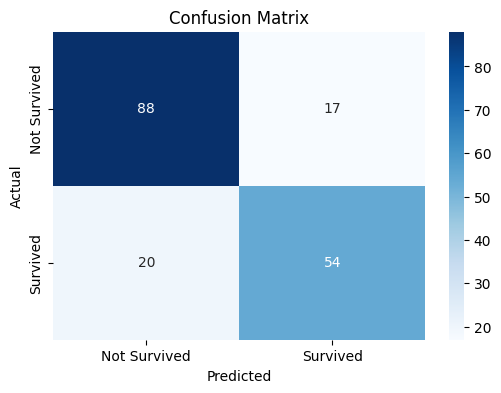

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Comparing different classifiers


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n{name} Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.2f}')



AdaBoost Performance:
Accuracy: 0.79
Precision: 0.76
Recall: 0.73
F1-score: 0.74

Logistic Regression Performance:
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76

Support Vector Machine Performance:
Accuracy: 0.66
Precision: 0.76
Recall: 0.26
F1-score: 0.38


In [1]:
print("hello world")

hello world
